In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [54]:
# load dataset
data=pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [58]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [60]:
data.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

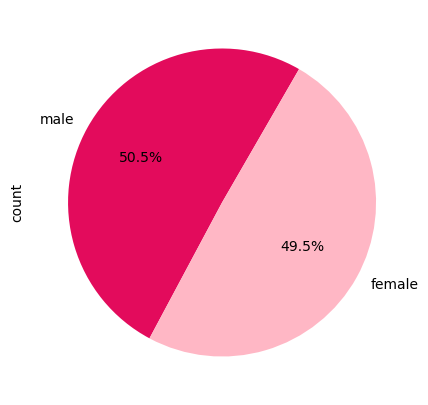

In [62]:
# distribuition of gender
plt.figure(figsize=(5,5))
data['sex'].value_counts().plot.pie(autopct='%1.1f%%',colors=['#E30B5C','#FFB7C5'],startangle=60)
plt.show()

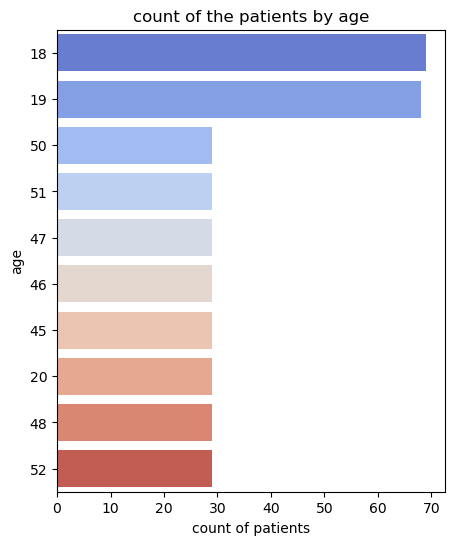

In [64]:
# count of patients by age
plt.figure(figsize=(5,6))
sns.countplot(y='age',data=data,order=data['age'].value_counts().head(10).index,palette='coolwarm')
plt.title('count of the patients by age')
plt.xlabel('count of patients')
plt.ylabel('age')
plt.show()

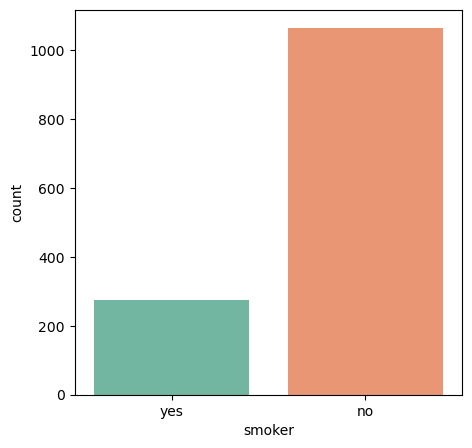

In [65]:
# smoker or not
plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data=data,palette='Set2')
plt.xlabel('smoker')
plt.ylabel('count')
plt.show()

In [66]:
# relationship b/n Bmi and insurence charges
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

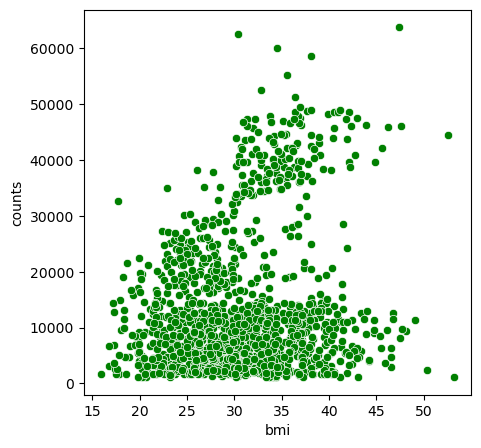

In [69]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='bmi',y='charges', data=data ,marker='o',color='green')
plt.xlabel('bmi')
plt.ylabel('counts')
plt.show()

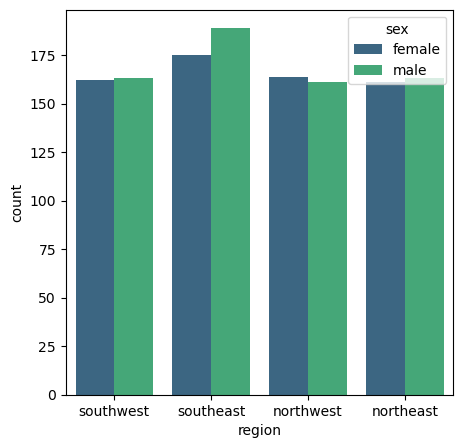

In [71]:
# number of patients in each region
plt.figure(figsize=(5,5))
sns.countplot(x='region',hue='sex',data=data,palette='viridis')
plt.xlabel('region')
plt.ylabel('count')
plt.legend(title='sex')
plt.show()

<Axes: xlabel='charges', ylabel='Density'>

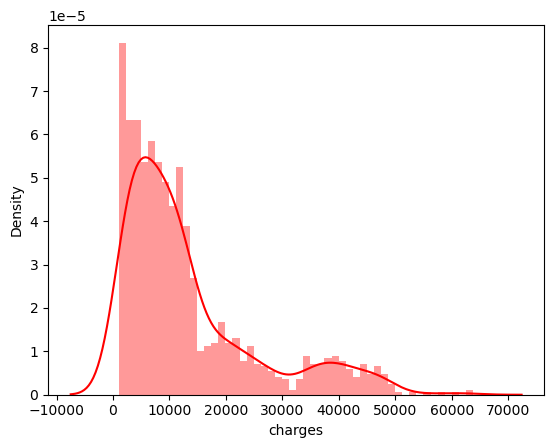

In [73]:
# distribution of insurence
sns.distplot(data['charges'],bins=50,color='r')

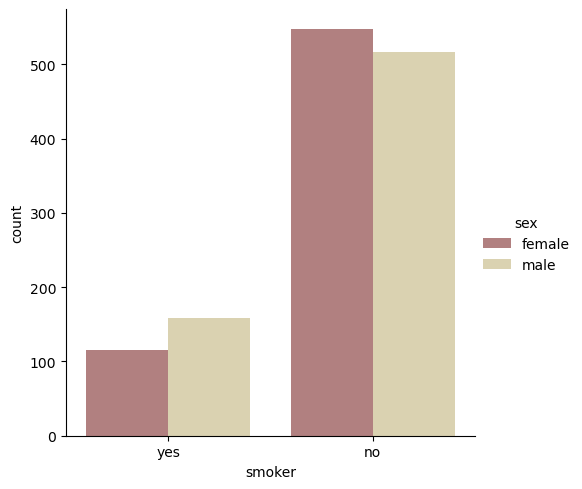

In [74]:
# comparison of  number of smoker in each gender
sns.catplot(x='smoker',kind='count',hue='sex',palette='pink',data=data)

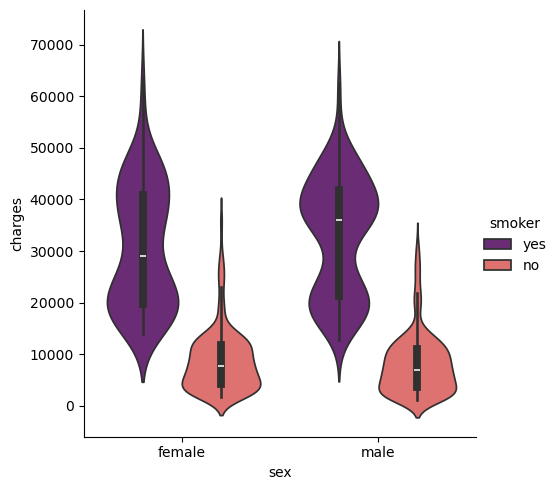

In [76]:
sns.catplot(x='sex',y='charges',hue='smoker',
            kind='violin',data=data,palette='magma')

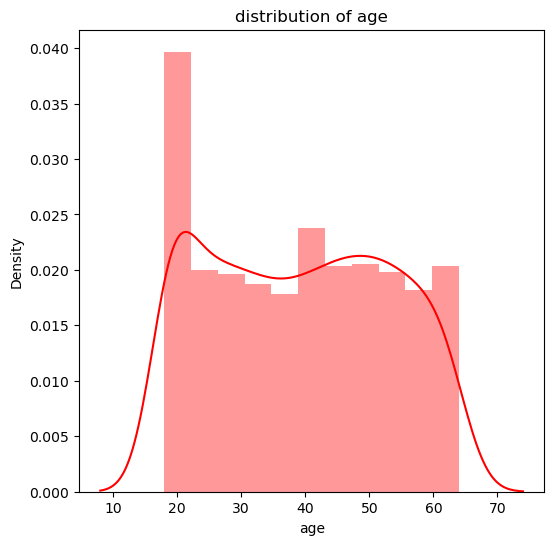

In [77]:
# distribution of age
plt.figure(figsize=(6,6))
plt.title('distribution of age')
ax=sns.distplot(data['age'],color='r')

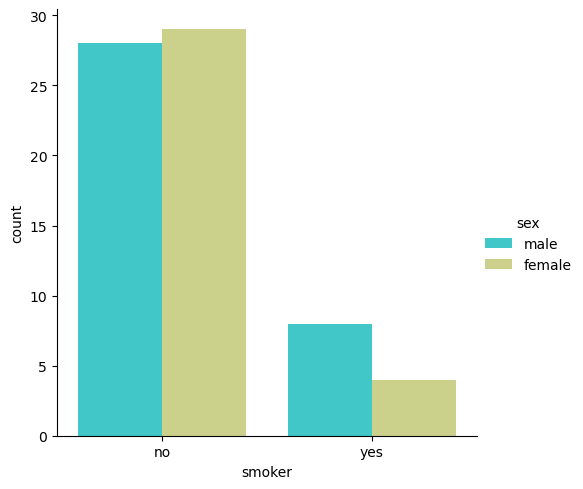

In [80]:
#The number of smokers and non-smokers(18 years old)
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=data[(data.age == 18)]);



<Axes: title={'center': 'Box plot for charges 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

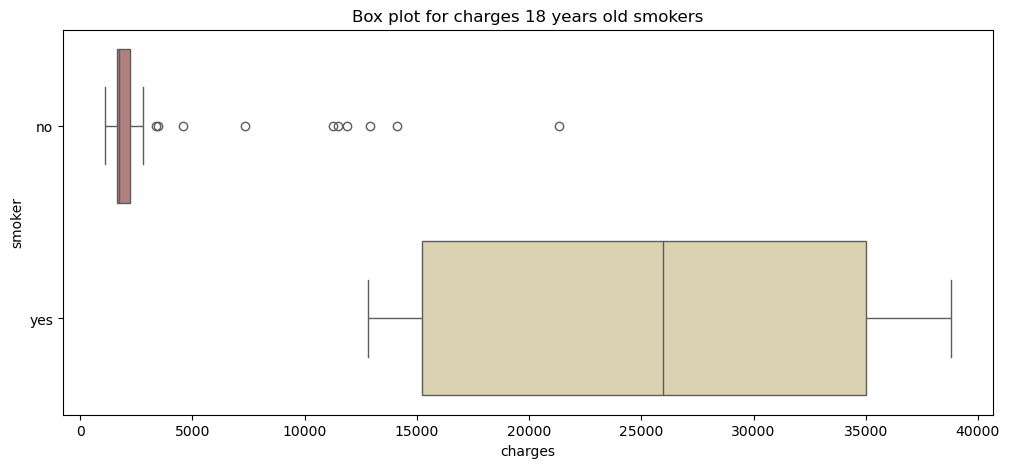

In [82]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 18)] , orient="h", palette = 'pink')

Text(0.5, 1.0, 'Smokers and non-smokers')

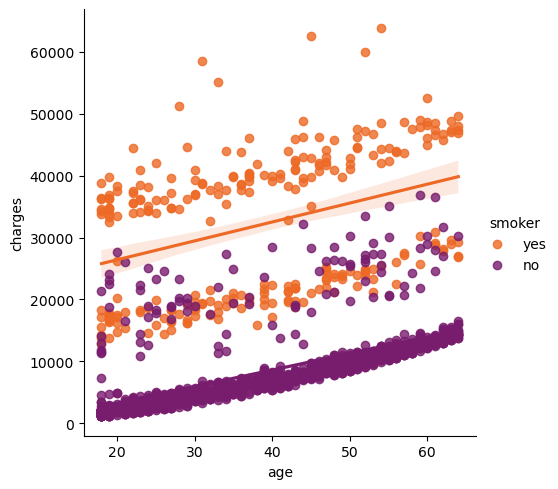

In [84]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'inferno_r')
ax.set_title('Smokers and non-smokers')

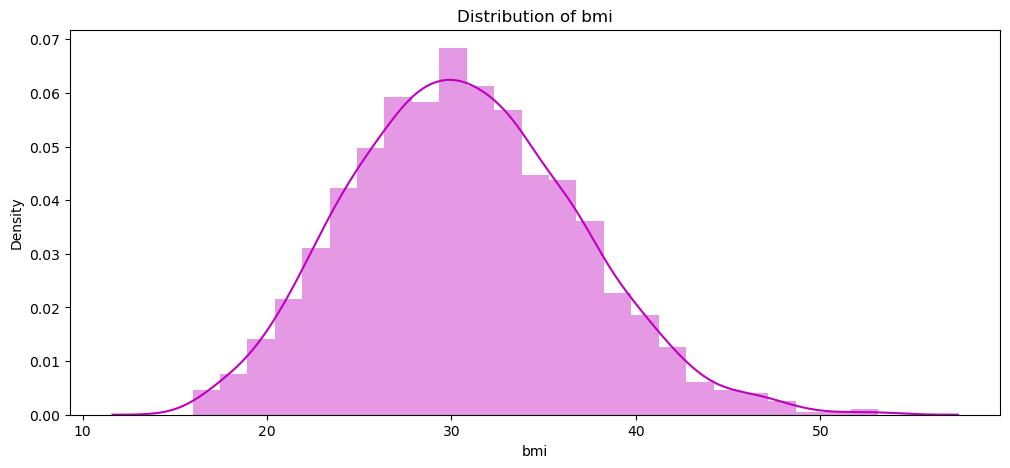

In [86]:
# Distribution of bmi
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')

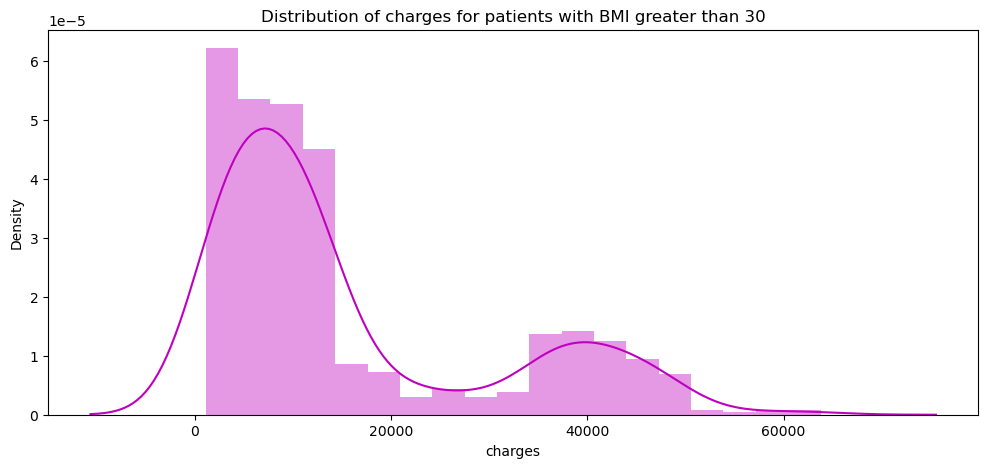

In [88]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'm')

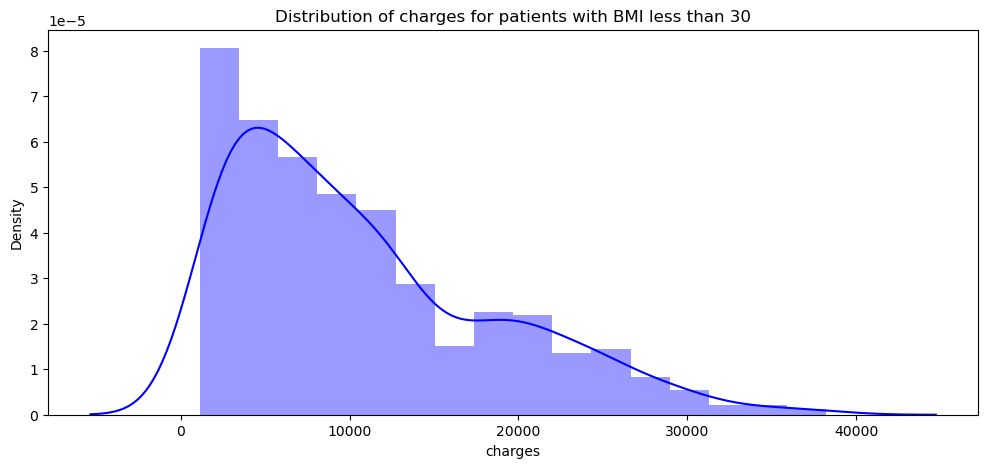

In [89]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'b')

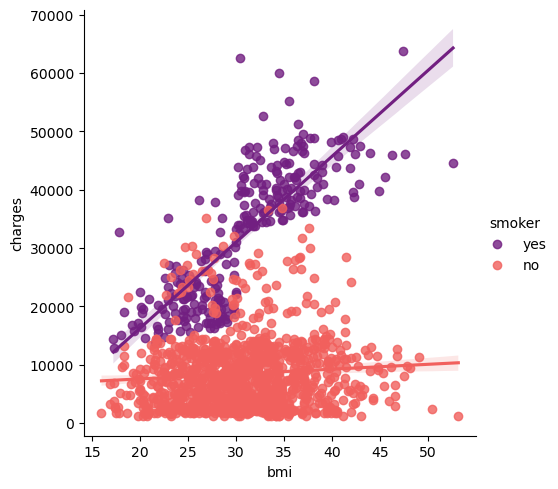

In [91]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette = 'magma')

# Encoding

In [97]:
from sklearn.preprocessing import LabelEncoder
# sex
le_sex=LabelEncoder()
data['sex']=le_sex.fit_transform(data['sex'])


In [99]:
data['sex'].value_counts()

sex
1    676
0    662
Name: count, dtype: int64

In [101]:
# smoker or not 
le_smoker=LabelEncoder()
data['smoker']=le_smoker.fit_transform(data['smoker'])

In [103]:
data['smoker'].value_counts()

smoker
0    1064
1     274
Name: count, dtype: int64

In [105]:
# region
le_region=LabelEncoder()
data['region']=le_region.fit_transform(data['region'])

In [107]:
data['region'].value_counts()

region
2    364
3    325
1    325
0    324
Name: count, dtype: int64

In [109]:
# save label mapping for reference
sex_mapping=dict(zip(le_sex.classes_,le_sex.transform(le_sex.classes_)))
smoker_mapping=dict(zip(le_smoker.classes_,le_smoker.transform(le_smoker.classes_)))
region_mapping=dict(zip(le_region.classes_,le_region.transform(le_region.classes_)))

In [31]:
# this code creates mapping b/w original cat values('male,female) and thir corresponding assigned by the LabelEncoder
# these mapping are saved as dictionaries for later use


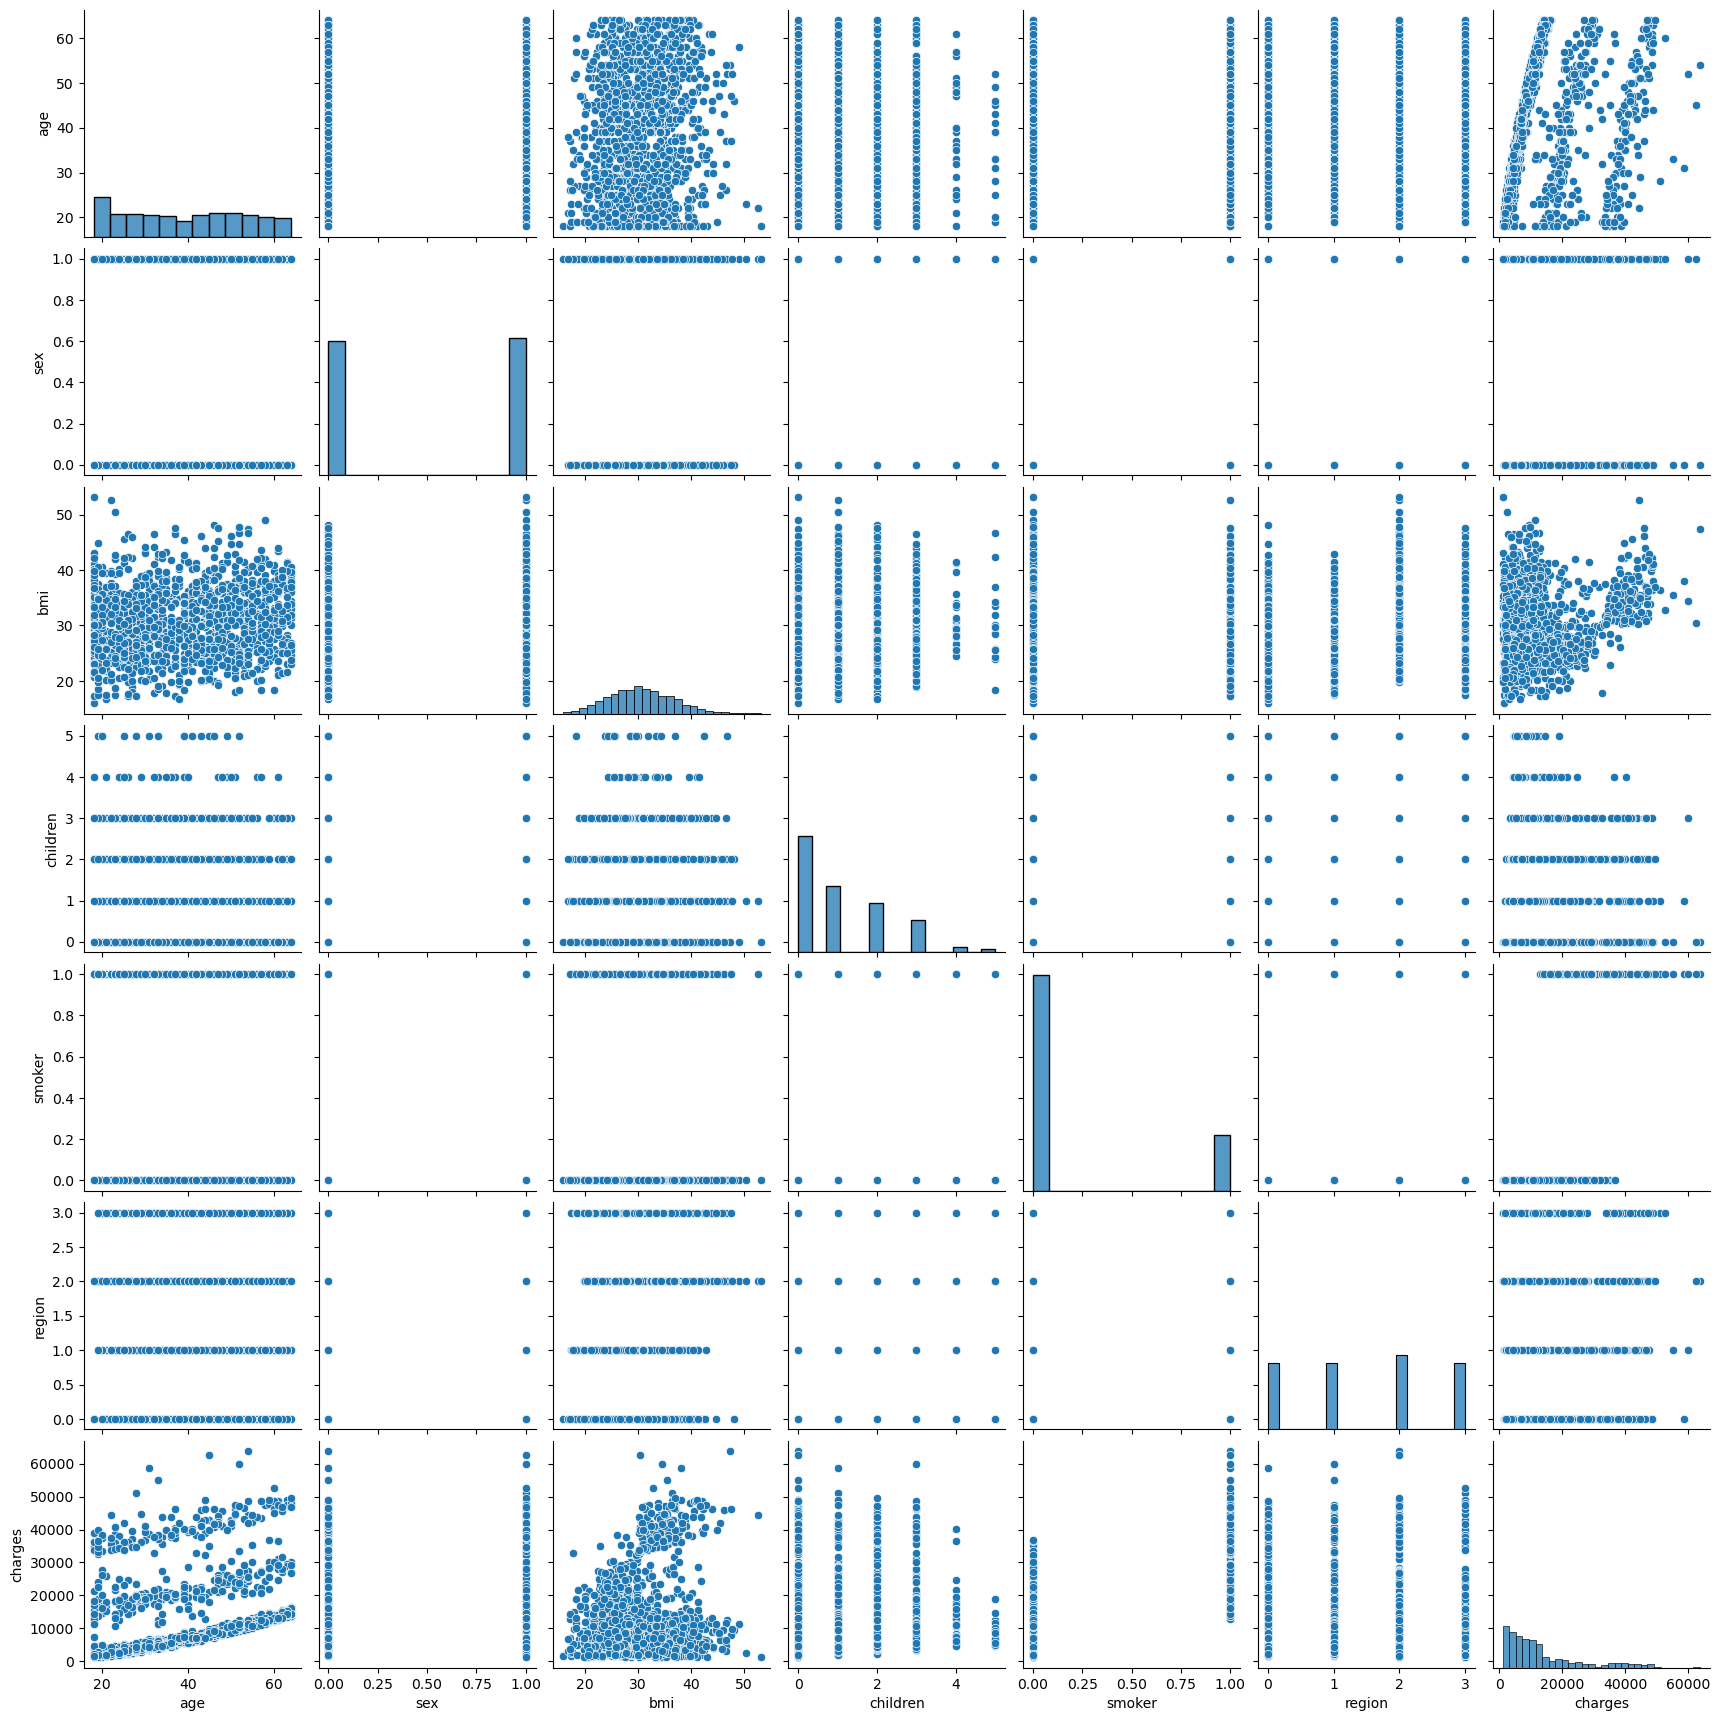

In [32]:
sns.pairplot(data)

<Axes: >

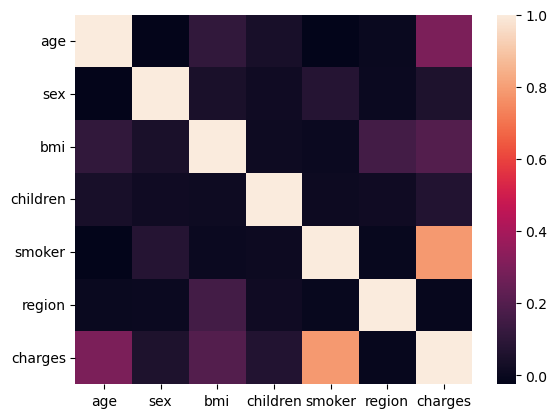

In [33]:
corr=data.corr()
sns.heatmap(corr)

Text(0.5, 1.0, 'DISTRIBUTION OF CHARGES FOR SMOKER')

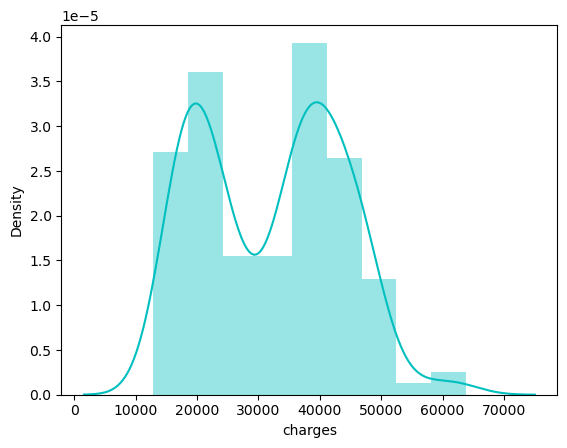

In [34]:
sns.distplot(data[(data.smoker==1)]['charges'],color='c')
ax.set_title('DISTRIBUTION OF CHARGES FOR SMOKER')

Text(0.5, 1.0, 'DISTRIBUTION OF CHARGES FOR NON SMOKER')

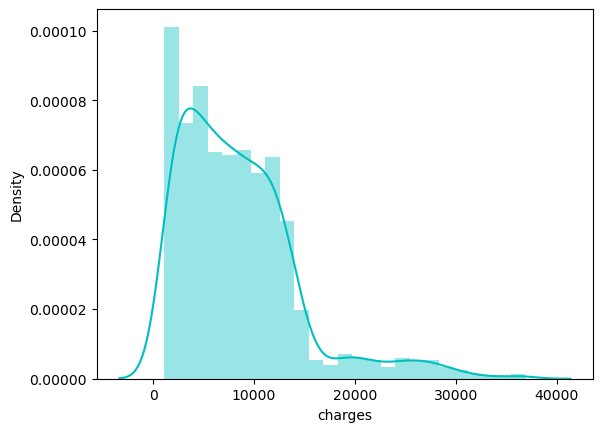

In [35]:

sns.distplot(data[(data.smoker==0)]['charges'],color='c')
ax.set_title('DISTRIBUTION OF CHARGES FOR NON SMOKER')

# MODEL BUILIDING

In [111]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [113]:
x=data.drop(['charges'],axis=1)
y=data.charges


In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [117]:
# to perform standardization
from sklearn.preprocessing import StandardScaler

In [119]:
# STANDARDIZE NUMERICAL FEATURES AFTER TRAIN-TEST SPLIT
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)# fit and transform ` the training data
x_test=scaler.transform(x_test)#trans form the test data



In [121]:
lr=LinearRegression().fit(x_train,y_train)

In [123]:
y_train_pred=lr.predict(x_train)

In [125]:
y_test_pred=lr.predict(x_test)

In [127]:
mse_train=mean_squared_error(y_train,y_train_pred)
r_squared_train=r2_score(y_train,y_train_pred)

In [129]:
print(mse_train)
print(r_squared_train)

38050102.806068085
0.7337162219022217


In [131]:
mse_test=mean_squared_error(y_test,y_test_pred)
r_squared_test=r2_score(y_test,y_test_pred)

In [133]:
print(mse_test)
print(r_squared_test)

32073628.56010921
0.7962732059725786


In [137]:
def predict_insurance(age, sex, bmi, children, smoker, region):
    # Encode categorical inputs using saved mappings
    sex_encoded = sex_mapping[sex]
    smoker_encoded = smoker_mapping[smoker]
    region_encoded = region_mapping[region]

    # Create input array
    input_data = np.array([[age, sex_encoded, bmi, children, smoker_encoded, region_encoded]])

    # Standardize input using the scaler fitted on the training data
    standardized_input = scaler.transform(input_data)
    # Predict charges
    predicted_charge = lr.predict(standardized_input)
    return predicted_charge[0]

In [141]:
# TEST WITH USER INPUT
age=35
sex="male"
bmi=30.5
children=2
smoker="no"
region="northwest"

predicted_charge= predict_insurance(age,sex,bmi,children,smoker,region)
print(f"predicted insurence charge:${predicted_charge:.2f}")


predicted insurence charge:$7918.28
